# SVR

## 1. Data preperation
Getting the data from the CSV file
Separating train test split
    20 times to get a variety of train and test sets for checking acurracy
Separating what will be predicted and what will be used to predict
Scaling data


In [ ]:
import pandas as pd  
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
import numpy as np

data = pd.read_csv('datasets/preprocessed_dataset.csv')

# Define Number of iterations to Test
ITERATION_COUNT = 20

# Max C value
C_NUM = 5

# dataset array
X_train = []
y_train = []
X_test  = []
y_test  = []

# For iterative Steps create 20 dataset variations
for i in range(0,ITERATION_COUNT):
    # Step 1: First split (Train: 80%, Test: 20%)
    train_set, test_set = train_test_split(data, test_size=0.2, random_state=42 + i)

    # Select the columns to scale (last two columns)
    cols_to_scale = ['longitude', 'latitude', 'median_income', 'median_house_value']

    # Initialize scaler and fit on training data only
    scaler = StandardScaler()
    train_scaled_values = scaler.fit_transform(train_set[cols_to_scale])
    test_scaled_values = scaler.transform(test_set[cols_to_scale])

    # Create new column names
    scaled_col_names = [f"{col}_scaled" for col in cols_to_scale]

    # Add scaled columns and drop originals
    for df, scaled_data in zip([train_set, test_set], [train_scaled_values, test_scaled_values]):
        for orig_col, scaled_col in zip(cols_to_scale, scaled_col_names):
            df[scaled_col] = scaled_data[:, scaled_col_names.index(scaled_col)]

    # Select features for model
    feature_cols = ['longitude_scaled', 'latitude_scaled', 'ocean_proximity_encoded', 'median_income_scaled',]
    target_col = 'median_house_value_scaled'

    # Extract features and targets and convert to numpy
    X_train.append(train_set[feature_cols].to_numpy())
    y_train.append(train_set[target_col].to_numpy())
    X_test.append(test_set[feature_cols].to_numpy())
    y_test.append(test_set[target_col].to_numpy())

data

,longitude,latitude,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,-122.23,37.88,8.3252,452600.0,NEAR BAY,2
1,-122.22,37.86,8.3014,358500.0,NEAR BAY,2
2,-122.26,37.84,2.0804,226700.0,NEAR BAY,2
3,-122.26,37.85,2.1250,140000.0,NEAR BAY,2
4,-122.26,37.84,1.9911,158700.0,NEAR BAY,2
...,...,...,...,...,...,...
18374,-121.09,39.48,1.5603,78100.0,INLAND,4
18375,-121.21,39.49,2.5568,77100.0,INLAND,4
18376,-121.22,39.43,1.7000,92300.0,INLAND,4
18377,-121.32,39.43,1.8672,84700.0,INLAND,4


### Lists for data accumulation

In [102]:
# Testing Results
SVR_MSE = []
SVR_MAPE = []
SVR_R2 = []
BEST_C = []


## Training the machine
for all 20 data sets
Define param grid
    Using C as the hyperparameter
Use GridsearchCV to find best param value

find the MSE, MAPE, and R2 values for the sets 

Show distribution of best C value

Best parameters found for iteration 0: {'C': 4}
Test MSE with best model: 0.3784
Test MAPE with best model : 1.8092
Test R² score: 0.6154
Best parameters found for iteration 1: {'C': 4}
Test MSE with best model: 0.3602
Test MAPE with best model : 2.4323
Test R² score: 0.6295
Best parameters found for iteration 2: {'C': 4}
Test MSE with best model: 0.3774
Test MAPE with best model : 1.6482
Test R² score: 0.6155
Best parameters found for iteration 3: {'C': 4}
Test MSE with best model: 0.3842
Test MAPE with best model : 2.3591
Test R² score: 0.6237
Best parameters found for iteration 4: {'C': 4}
Test MSE with best model: 0.3883
Test MAPE with best model : 1.6992
Test R² score: 0.6297
Best parameters found for iteration 5: {'C': 4}
Test MSE with best model: 0.3561
Test MAPE with best model : 5.3457
Test R² score: 0.6342
Best parameters found for iteration 6: {'C': 4}
Test MSE with best model: 0.3622
Test MAPE with best model : 2.6686
Test R² score: 0.6319
Best parameters found for iteratio

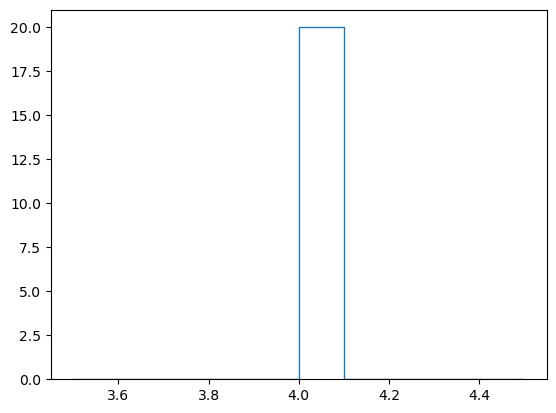

In [103]:
# parameter grid containing the parameters for the SVR model
param_grid = {
    "C": range(1,C_NUM)
}

for i in range(0,ITERATION_COUNT):
    # Define base model
    svr = SVR(kernel='rbf')

    # Perform Grid Search with 3-fold cross-validation
    grid_search = GridSearchCV(svr,param_grid,cv=3,scoring='neg_mean_squared_error',)

    # Fit only on the training set
    grid_search.fit(X_train[i], y_train[i])

    from sklearn.metrics import accuracy_score

    # Evaluate best model on the validation set
    best_model = grid_search.best_estimator_
    test_preds = best_model.predict(X_test[i])
    test_mse = mean_squared_error(y_test[i], test_preds)
    test_mape = mean_absolute_percentage_error(y_test[i], test_preds)
    test_r2 = r2_score(y_test[i], test_preds)

    # Print Results
    print(f"Best parameters found for iteration {i}: {grid_search.best_params_}")
    print(f"Test MSE with best model: {test_mse:.4f}")
    print(f"Test MAPE with best model : {test_mape:.4f}")
    print(f"Test R² score: {test_r2:.4f}")

    # Append to Results
    SVR_MSE.append(test_mse)
    SVR_MAPE.append(test_mape)
    SVR_R2.append(test_r2)
    BEST_C.append(int(grid_search.best_params_["C"]))


counts, bins = np.histogram(BEST_C)
plt.stairs(counts, bins)

plt.show()

## 3. Display MSE, MAPE, and R2 values in a boxplot

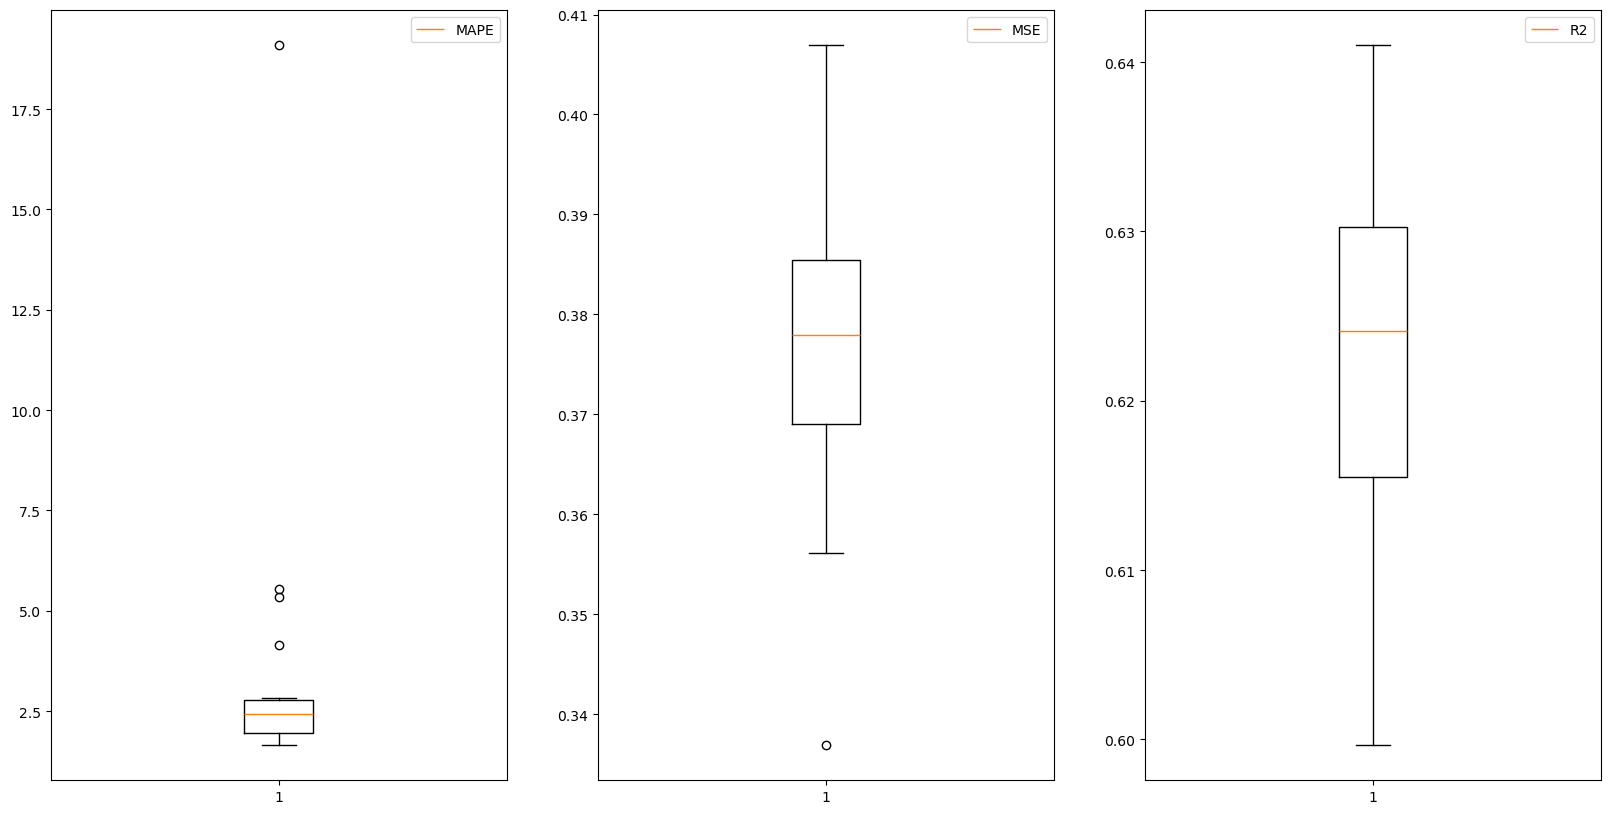

In [107]:
# Combine data into a single DataFrame
data = pd.DataFrame({
    'MSE': SVR_MSE,
    'MAPE': SVR_MAPE,
    'R²': SVR_R2
})

# Melt the DataFrame to long-form for seaborn
long_data = data.melt(var_name='Metric', value_name='Score')

# Plot boxplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

ax[0].boxplot(SVR_MAPE, label = "MAPE")
ax[0].legend()
ax[1].boxplot(SVR_MSE, label = "MSE")
ax[1].legend()
ax[2].boxplot(SVR_R2, label = "R2")
ax[2].legend()


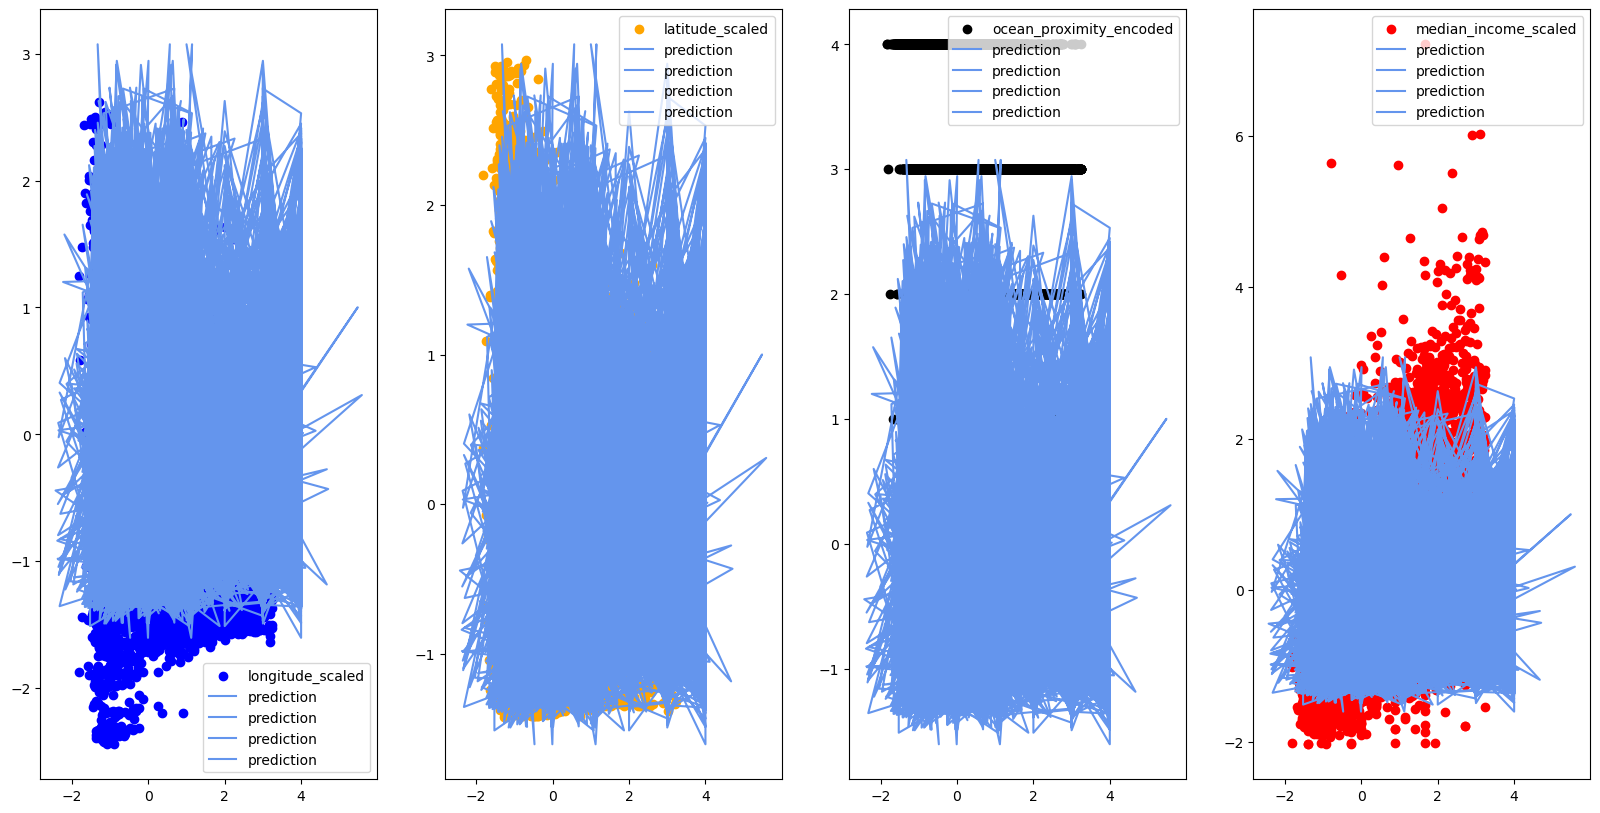

In [105]:
x = train_set['median_house_value_scaled']


fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,10))
ax[0].scatter(x,train_set['longitude_scaled'], label='longitude_scaled', color = "blue")
ax[0].plot(X_test[1], test_preds, color='cornflowerblue', 
         label='prediction')
ax[0].legend() 
ax[1].scatter(x,train_set['latitude_scaled'], label='latitude_scaled', color = "orange")
ax[1].plot(X_test[1], test_preds, color='cornflowerblue', 
         label='prediction')
ax[1].legend() 
ax[2].scatter(x,train_set['ocean_proximity_encoded'], label='ocean_proximity_encoded', color = "black")
ax[2].plot(X_test[1], test_preds, color='cornflowerblue', 
         label='prediction')
ax[2].legend() 
ax[3].scatter(x,train_set['median_income_scaled'], label='median_income_scaled', color = "red")
ax[3].plot(X_test[1], test_preds, color='cornflowerblue', 
         label='prediction')
ax[3].legend() 